In [49]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [85]:
# Load the data

df = pd.read_csv('iris.csv')

In [86]:
# information

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [87]:
# Checking null values

df.isnull().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

In [88]:
# Checking duplicate value

df.duplicated().sum()

3

In [89]:
# Remove duplicate value

df.drop_duplicates(inplace=True)

In [90]:
df.groupby('species').mean()

,sepal_length,sepal_width,petal_length,petal_width
species,,,,
Iris-setosa,5.010417,3.431250,1.462500,0.250000
Iris-versicolor,5.936000,2.770000,4.260000,1.326000
Iris-virginica,6.604082,2.979592,5.561224,2.028571


### Data Visualization

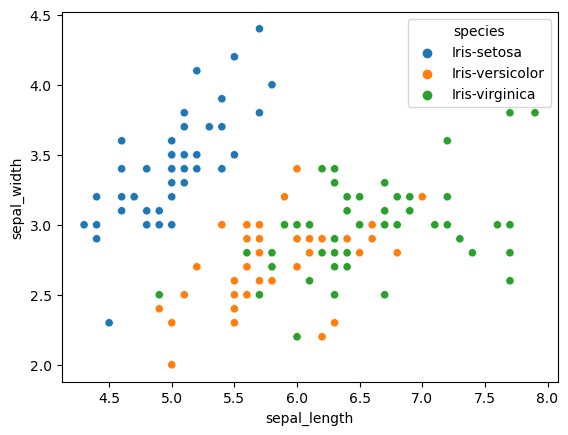

In [91]:
sns.scatterplot(x='sepal_length', y='sepal_width', hue='species', data=df)
plt.show()

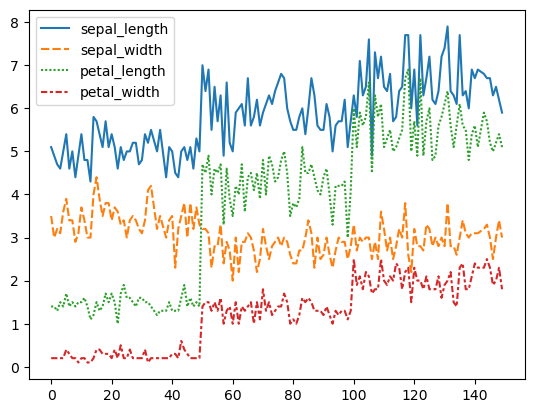

In [92]:
sns.lineplot(data=df.drop(['species'], axis=1))
plt.show()

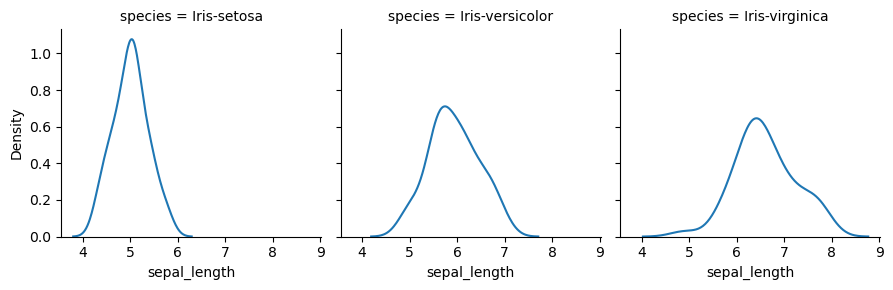

In [95]:
# Density every species

g = sns.FacetGrid(df, col='species')
g = g.map(sns.kdeplot, 'sepal_length')

In [93]:
# Correlation

corr= df.corr()
corr

,sepal_length,sepal_width,petal_length,petal_width
sepal_length,1.000000,-0.109321,0.871305,0.817058
sepal_width,-0.109321,1.000000,-0.421057,-0.356376
petal_length,0.871305,-0.421057,1.000000,0.961883
petal_width,0.817058,-0.356376,0.961883,1.000000


In [96]:
df.corr().style.background_gradient(cmap='coolwarm').set_precision(2)

,sepal_length,sepal_width,petal_length,petal_width
sepal_length,1.00,-0.11,0.87,0.82
sepal_width,-0.11,1.00,-0.42,-0.36
petal_length,0.87,-0.42,1.00,0.96
petal_width,0.82,-0.36,0.96,1.00


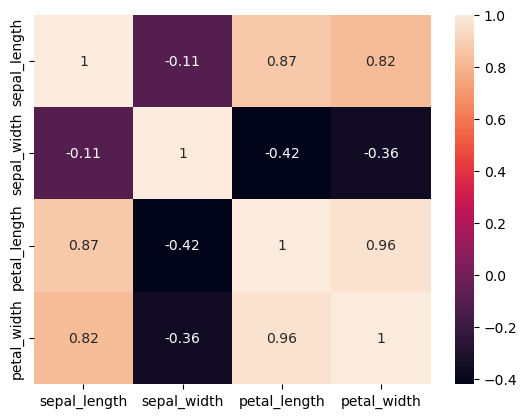

In [94]:
# Heatmap

sns.heatmap(corr, annot=True)
plt.show()

### Machine Learning

In [97]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report

In [98]:
x = df.drop('species', axis=1)
y = df.species

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [99]:
# Logistic Regression

from sklearn.linear_model import LogisticRegression

model = LogisticRegression()
model.fit(x, y)

y_predict = model.predict(x)

accuracy = accuracy_score(y, y_predict)
print('Accuracy: ', accuracy)

Accuracy:  0.9727891156462585


In [102]:
# classification report

classification_rep = classification_report(y_test, y_pred)
print(classification_rep)

                 precision    recall  f1-score   support

    Iris-setosa       0.40      0.36      0.38        11
Iris-versicolor       0.44      0.40      0.42        10
 Iris-virginica       0.36      0.44      0.40         9

       accuracy                           0.40        30
      macro avg       0.40      0.40      0.40        30
   weighted avg       0.40      0.40      0.40        30

